In [9]:
import gdal
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageFilter
import numpy as np

In [10]:
file1 = r'C:\Users\rohit\Downloads\ch2_tmc_ndn_20191125T0749024692_d_oth_d18\data\derived\20191125\ch2_tmc_ndn_20191125T0749024692_d_oth_d18.tif'
file2 = r'C:\Users\rohit\Downloads\ch2_tmc_ndn_20191015T1021251544_d_oth_d18\data\derived\20191015\ch2_tmc_ndn_20191015T1021251544_d_oth_d18.tif'

In [11]:
ras1 = gdal.Open(file1)
ras2 = gdal.Open(file2)

In [12]:
print(ras1.GetMetadata())

{'AREA_OR_POINT': 'Area'}


In [13]:
print(ras1.RasterCount)
  
# width 
print(ras1.RasterXSize)
  
# height
print(ras1.RasterYSize)

1
5372
162300


In [14]:
print(ras2.RasterCount)
  
# width 
print(ras2.RasterXSize)
  
# height
print(ras2.RasterYSize)

1
4128
80224


In [17]:
geoTransform1 = ras1.GetGeoTransform()
geoTransform2 = ras2.GetGeoTransform()
minx = geoTransform1[0]
maxy = geoTransform1[3]
maxx = minx + geoTransform1[1] * ras2.RasterXSize
miny = maxy + geoTransform1[5] * ras2.RasterYSize
print(minx,maxx,miny,maxy)

234.13447097844653 234.82219577844654 14.465013620854128 27.83033202085413


In [18]:
geoTransform1

(234.13447097844653, 0.0001666, 0.0, 27.83033202085413, 0.0, -0.0001666)

In [19]:
rasArray1 = gdal.Open(file1).ReadAsArray()
rasArray2 = gdal.Open(file2).ReadAsArray()

In [27]:
# new_image1 = cv2.blur(rasArray1,(9, 9))
# new_image2 = cv2.blur(rasArray2,(9, 9))
new_image1 = cv2.resize(rasArray1, (150000,5000))

In [28]:
new_image1.shape

(5000, 150000)

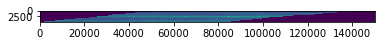

In [29]:
f = plt.figure()
plt.imshow(new_image1)
plt.show()

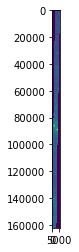

In [31]:
f = plt.figure()
plt.imshow(rasArray1)
plt.show()

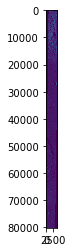

In [37]:
f = plt.figure()
plt.imshow(rasArray2)
plt.show()

In [33]:
rasArray1.shape

(162300, 5372)

In [45]:
rasArray2.shape

(80224, 4128)

In [57]:
z = np.zeros((80224,5372-4128), dtype='uint8')
rasArray2Mod = np.append(rasArray2, z, axis=1)

In [58]:
rasArray2Mod.shape

(80224, 5372)

In [50]:
combinedArray = np.concatenate((rasArray1, rasArray2Mod), axis=0)

In [51]:
combinedArray.shape

(242524, 5372)

MemoryError: Unable to allocate 9.71 GiB for an array with shape (242524, 5372) and data type int64

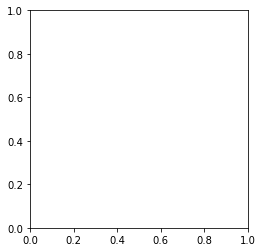

In [52]:
f = plt.figure()
plt.imshow(combinedArray)
plt.show()

In [55]:
outFileName = r'C:\Users\rohit\Downloads\combined.tif'
[rows, cols] = combinedArray.shape
arr_min = combinedArray.min()
arr_max = combinedArray.max()
# arr_mean = int(arr.mean())
# arr_out = numpy.where((arr < arr_mean), 10000, arr)
driver = gdal.GetDriverByName("GTiff")
outdata = driver.Create(outFileName, cols, rows, 1, gdal.GDT_UInt16)
outdata.SetGeoTransform(GetGeoTransform())##sets same geotransform as input
# outdata.SetProjection(ds.GetProjection())##sets same projection as input
outdata.GetRasterBand(1).WriteArray(combinedArray)
outdata.GetRasterBand(1).SetNoDataValue(10000)##if you want these values transparent
outdata.FlushCache() ##saves to disk!!
outdata = None
# band=None
# ds=None

MemoryError: Unable to allocate 9.71 GiB for an array with shape (242524, 5372) and data type float64